# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Bruger\AppData\Local\Temp\ipykernel_13808\1842324635.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


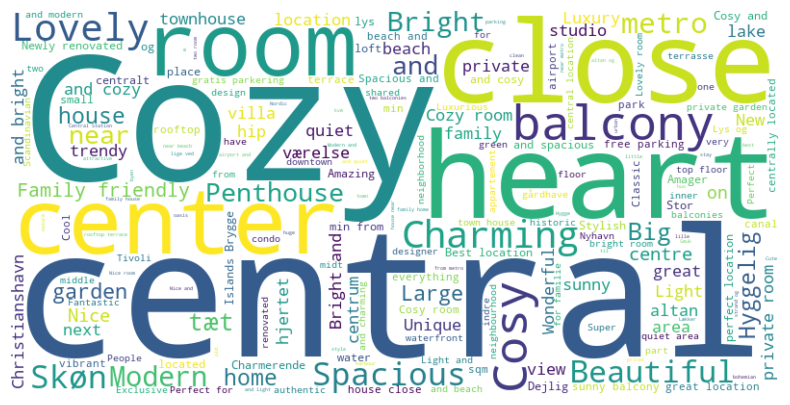

In [11]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

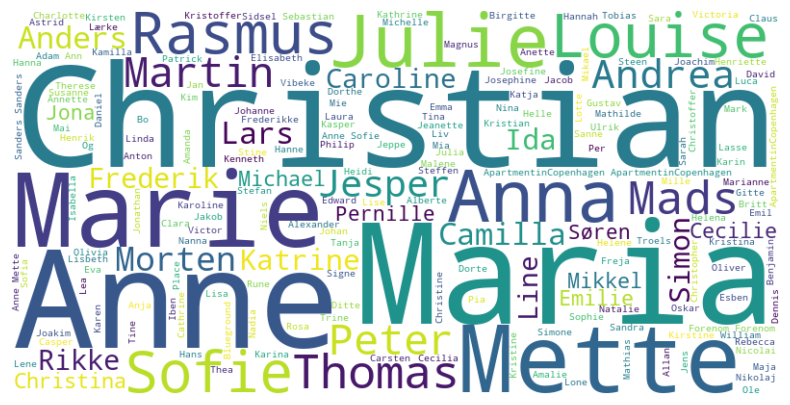

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


data = pd.read_csv('listings.csv')


data_filtered = data.dropna(subset=['host_name'])


non_name_words = ['denmark', 'apartment', 'studio', 'room', 'airbnb', 'house', 'home', 'guest', 'suite']


def is_valid_name(word):
    return word[0].isupper() and word.lower() not in non_name_words


text = ' '.join(data_filtered['host_name'])
words = text.split()


filtered_words = [word for word in words if is_valid_name(word)]


filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(filtered_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [5]:
import pandas as pd
import folium

# Load the data
data = pd.read_csv('listings.csv')

# Filter out rows with missing lat/lon values
data_filtered = data.dropna(subset=['latitude', 'longitude'])

# Calculate the center of the map (mean latitude and longitude of all listings)
center_lat = data_filtered['latitude'].mean()
center_lon = data_filtered['longitude'].mean()

# Create a folium map centered around the average location
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add the listings as markers on the map
for _, row in data_filtered.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['host_name']).add_to(m)

# Display the map
m


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Bruger\AppData\Local\Temp\ipykernel_19152\1362430510.py:16: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


Summary of price data:
              price
count  13815.000000
mean    1205.878972
std     1433.143149
min        0.000000
25%      729.000000
50%      995.000000
75%     1368.500000
max    64900.000000


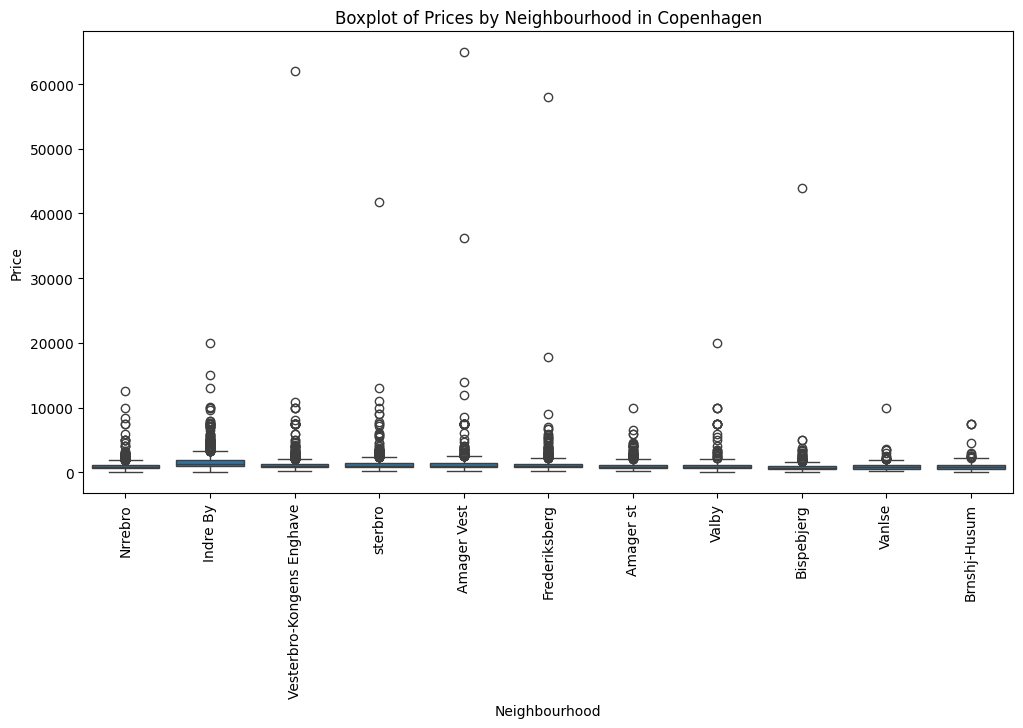

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('listings.csv')

# Check if columns 'price' and 'neighbourhood_cleansed' exist in the data
if 'price' not in data.columns or 'neighbourhood_cleansed' not in data.columns:
    print("Error: 'price' or 'neighbourhood_cleansed' column not found in the data.")
else:
    # Filter for rows with non-null 'price' and 'neighbourhood_cleansed' values
    data_filtered = data.dropna(subset=['price', 'neighbourhood_cleansed']).copy()

    # Convert 'price' to numeric, remove any currency symbols or non-numeric characters if necessary
    data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

    # Check if any rows remain after filtering
    if len(data_filtered) == 0:
        print("Error: No valid data available after filtering.")
    else:
        # Check summary statistics for price to ensure correctness
        print("Summary of price data:")
        print(data_filtered[['neighbourhood_cleansed', 'price']].describe())

        # Boxplot for 'price' by 'neighbourhood_cleansed'
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='neighbourhood_cleansed', y='price', data=data_filtered)
        plt.xticks(rotation=90)  # Rotate x-axis labels for readability
        plt.title('Boxplot of Prices by Neighbourhood in Copenhagen')
        plt.xlabel('Neighbourhood')
        plt.ylabel('Price')
        plt.show()


### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('listings.csv')

# Clean the price column (remove dollar sign and commas, convert to numeric)
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check for any non-numeric values that may have caused issues
print(df['price'].isna().sum(), "non-numeric price values found")  # Optional check

# Group by neighborhood and room type, then calculate descriptive statistics
descriptive_stats = df.groupby(['neighbourhood_cleansed', 'room_type'])['price'].agg(
    mean='mean',
    median='median',
    mode=lambda x: x.mode()[0] if not x.mode().empty else None,
    std_dev='std',
    variance='var',
    min='min',
    max='max',
    Q1=lambda x: x.quantile(0.25),
    Q2=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75)
).reset_index()

# Print the results
print(descriptive_stats)


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Bruger\AppData\Local\Temp\ipykernel_19152\3434472065.py:7: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


0 non-numeric price values found
       neighbourhood_cleansed        room_type         mean  median    mode  \
0                 Amager Vest  Entire home/apt  1408.319288  1079.0  1000.0   
1                 Amager Vest     Private room  1002.624242   500.0   500.0   
2                 Amager Vest      Shared room  1051.500000  1051.5   972.0   
3                   Amager st  Entire home/apt  1115.591116   932.5  1000.0   
4                   Amager st       Hotel room  1296.000000  1201.0  1149.0   
5                   Amager st     Private room   612.090909   493.0   450.0   
6                   Amager st      Shared room  1567.500000  1567.5   560.0   
7                  Bispebjerg  Entire home/apt   983.137457   800.0   700.0   
8                  Bispebjerg     Private room   485.217391   400.0   300.0   
9                  Bispebjerg      Shared room   198.000000   198.0   198.0   
10               Brnshj-Husum  Entire home/apt  1105.551587   900.0  1200.0   
11               Br

### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('listings.csv')

# Clean the price column
df['price'] = df['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Select relevant features
features = ['number_of_reviews', 'review_scores_rating']
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)  # One-hot encoding for room_type

# Check for missing values
print("Missing values in each column:")
print(df.isna().sum())

# Handle missing values for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Define target and features
X = df[features + [col for col in df.columns if 'room_type_' in col]]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Model 2: Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

# Model 3: Random Forest Regression
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)

# Evaluate the models
models = {
    "Linear Regression": (y_pred_lin, y_test),
    "Decision Tree": (y_pred_tree, y_test),
    "Random Forest": (y_pred_forest, y_test)
}

for model_name, (y_pred, y_true) in models.items():
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n  MAE: {mae:.2f}\n  R²: {r2:.2f}\n")

    # Calculate percentage error
    percentage_error = np.abs((y_true - y_pred) / y_true) * 100

    # Plot actual vs predicted
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)  # Line of perfect prediction
    plt.title(f'{model_name}: Actual vs Predicted Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.xlim([0, max(y_true) + 100])
    plt.ylim([0, max(y_true) + 100])
    plt.grid(True)
    plt.show()

    # Print average percentage error
    print(f"{model_name} Average Percentage Error: {percentage_error.mean():.2f}%\n")


Missing values in each column:
id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count_shared_rooms       0
reviews_per_month                              1645
room_type_Hotel room                              0
room_type_Private room                            0
room_type_Shared room                             0
Length: 77, dtype: int64
Linear Regression:
  MAE: 520.04
  R²: 0.03

Decision Tree:
  MAE: 562.90
  R²: -0.04

Random Forest:
  MAE: 544.02
  R²: -0.00

